## HW 11 - Data fitting with various functions - Due Monday Nov 8, 2021


Dowload the data from the SDSS DR16:<br>
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits
NOTE: it is a large file and will take a while.


Using masking. Select the approprate fitting function and fit the following selections of the data:
1. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LogG (LOGG\_ERR)__<br>
<br>
2. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
3. Select stars only with with $-2< GLAT < 2$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
4. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit {\bf  GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
6. __Fit {\bf NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
7. __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For each of the above selections:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

ColDefs(
    name = 'APSTAR_ID'; format = '57A'
    name = 'TARGET_ID'; format = '47A'
    name = 'ASPCAP_ID'; format = '59A'
    name = 'FILE'; format = '39A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    na

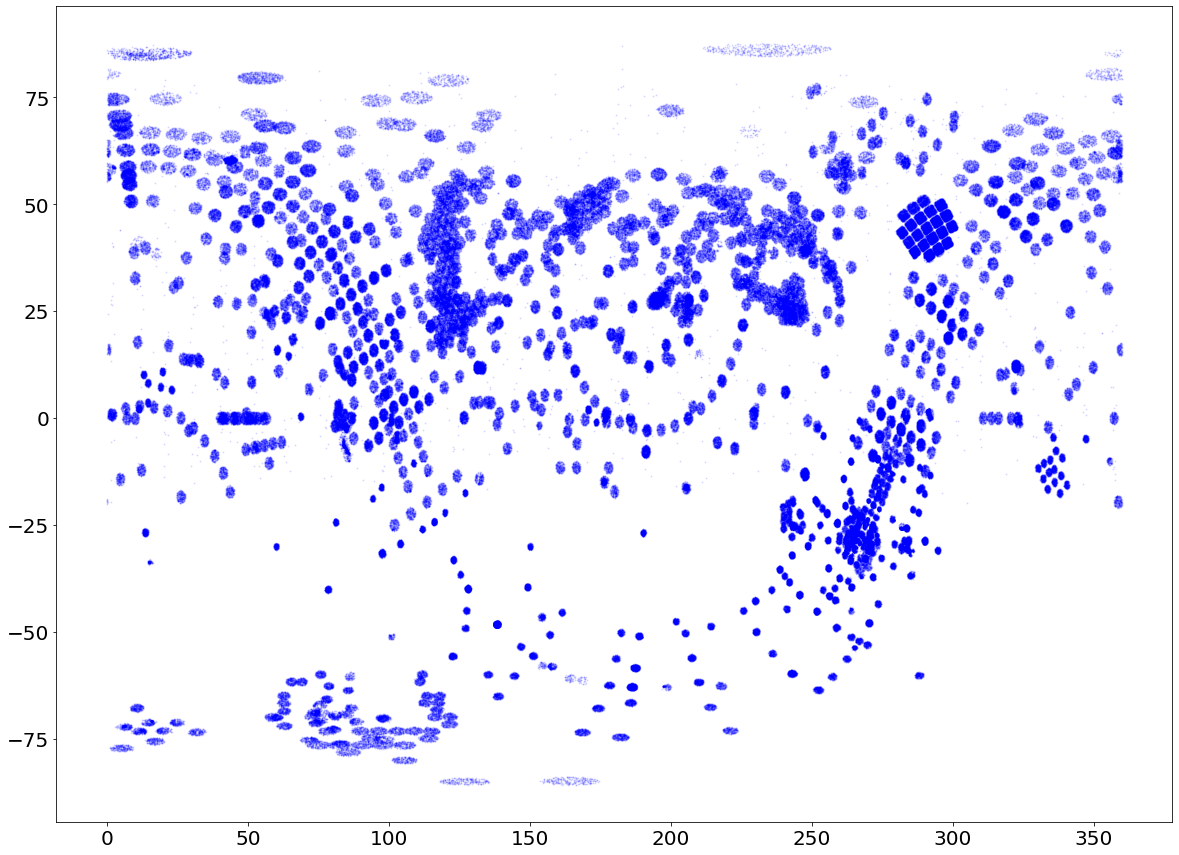

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

<ipython-input-39-2154b22ca346>:17: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


LOGFIT:  2.655462590545438 1.0012427084196298 -2341.12252239555 -18.229357238482798


<ipython-input-39-2154b22ca346>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


LINEAR:  0.0009787748404883859 -2.3799657167739037


<ipython-input-39-2154b22ca346>:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)


LINEAR:  -0.00018710427117585716 5.465110280974469


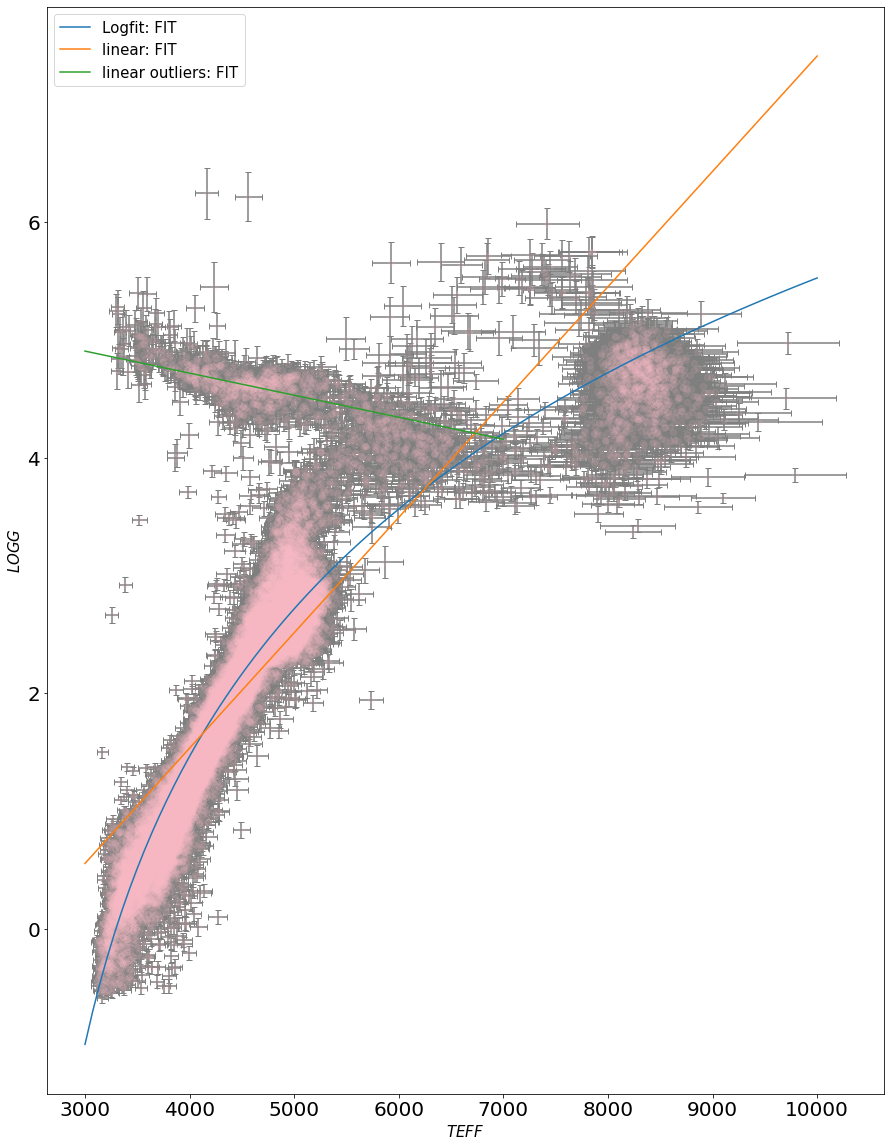

In [39]:
mk = (star['GLAT'] < 1) & (star['GLAT'] > -1) & (star['TEFF'] > 0) & (star['LOGG'] > -5)
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['LOGG'][mask]
ydat_err = star['LOGG_ERR'][mask]
xdat = star['TEFF'][mask]
xdat_err = star['TEFF_ERR'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='pink', alpha = 0.1)
ax.errorbar(xdat, ydat, xerr = xdat_err, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=0.5, capsize=3 ,zorder=0)

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
        
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))

a,b,c,d = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err, p0=[2.6, 1.2, -2600, -18])
print("LOGFIT: ", a, b, c, d)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('$TEFF$', fontsize=15)
ax.set_ylabel('$LOGG$', fontsize=15)

x_plot = np.linspace(3000, 10000, 100)
ax1.plot(x_plot, logfit(x_plot, a, b, c, d), label = 'Logfit: FIT')

##Show linear

def linear(x,m,b):
    return m*x+b
slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax2 = fig.add_subplot(111)
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000,10000,100)
ax2.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')

##Outlier graph

mk2 = (star['GLAT'] < 1) & (star['GLAT'] > -1) & (star['TEFF'] > 0) & (star['TEFF'] < 7000) & (star['LOGG'] > 4)
mask2 = np.where(mk2)[0]

glat_mask2 = star['GLAT'][mask2]
ydat2 = star['LOGG'][mask2]
ydat_err2 = star['LOGG_ERR'][mask2]
xdat2 = star['TEFF'][mask2]
xdat_err2 = star['TEFF_ERR'][mask2]



def linear(x,m,b):
    return m*x+b

def mcFit2(func, x, y, x_err, y_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

slope, intercept = mcFit2(linear, xdat2, ydat2, xdat_err2, ydat_err2)
print("LINEAR: ", slope, intercept)

#ax2 = fig.add_subplot(111)
#ax2.xaxis.set_tick_params(labelsize=20)
#ax2.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 7000, 100)
ax1.plot(x_plot, linear(x_plot, slope, intercept), label='linear outliers: FIT')


plt.legend(loc='best', fontsize=15)
plt.show()




POLY 3:  0.01894702475071866 -0.040637209918934575 -0.2931573396881618 0.03182481721091128


<ipython-input-43-309b92b33ec4>:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = fig.add_subplot(111)


LINEAR:  -0.2154113969000515 0.04014967713136042


<ipython-input-43-309b92b33ec4>:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig.add_subplot(111)


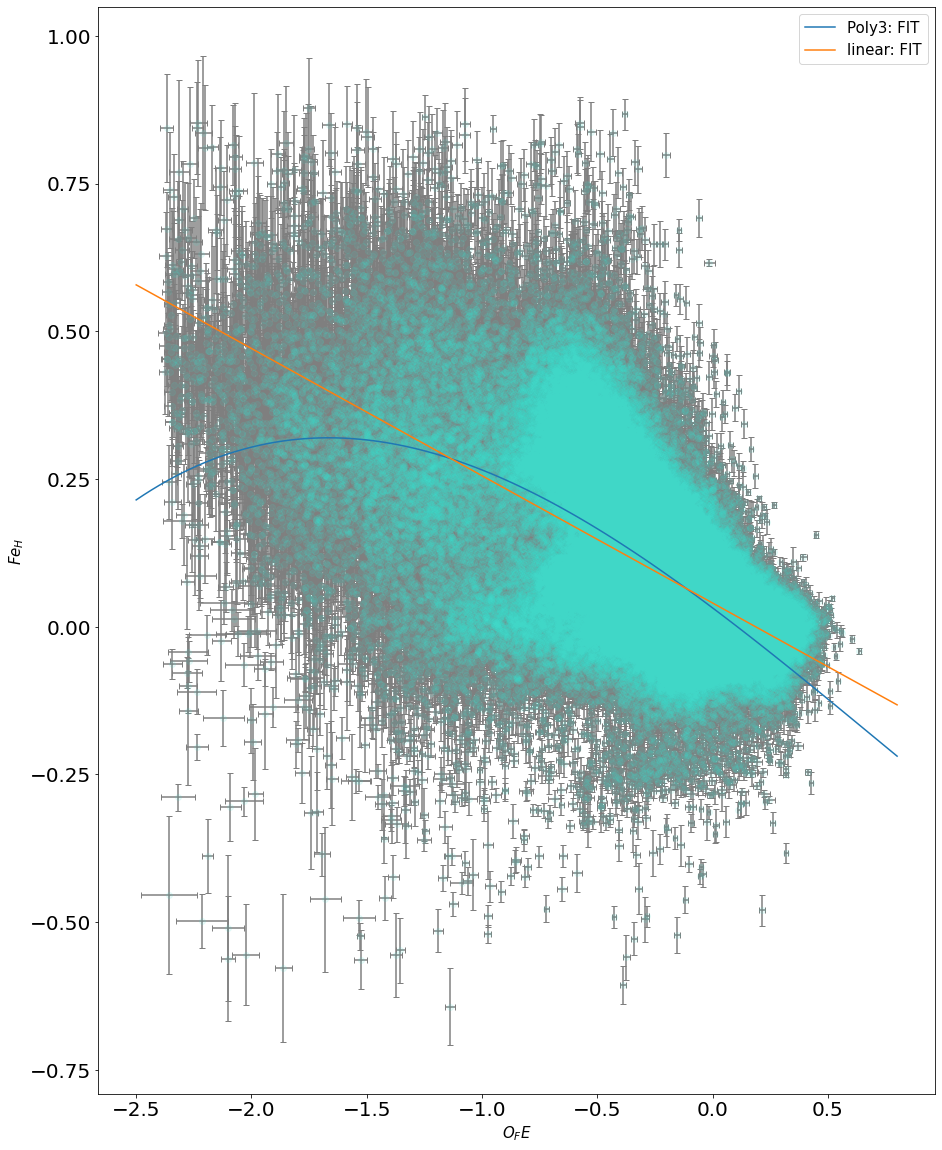

In [43]:
##Select stars only with GLAT < -10 or GLAT >10


mk = (abs(star['GLAT']) > 10) & (star['O_FE'] > -100)
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
xdat = star['Fe_H'][mask]
xdat_err = star['Fe_H_ERR'][mask]
ydat = star['O_FE'][mask]
ydat_err = star['O_FE_ERR'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='turquoise', alpha=0.1,)
ax.errorbar(xdat, ydat, xerr = xdat_err, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.set_xlabel('$FE_H$', fontsize=15)
ax.set_ylabel('$O_FE$', fontsize=15)

##Polynomial 3 

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


a,b,c,d = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err, p0=[4,-4,-1,-0.1])
print("POLY 3: ", a, b, c, d)

ax3 = fig.add_subplot(111)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)

x_plot = np.linspace(-2.5, 0.8, 100)
ax3.plot(x_plot, poly3(x_plot, a, b, c, d), label='Poly3: FIT')

##Linear Fit

def linear(x,m,b):
    return m*x+b
slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax4 = fig.add_subplot(111)
ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-2.5, 0.8,100)
ax4.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')

plt.legend(loc='best', fontsize=15)
plt.show()

a. the best fit parameters are a = 0.0189, b = -0.0406, c = -0.293, d = 0.0318
b. The Poly 3 fit is the best fit
c. There is no obvious linear fit for outliers

POLY 3:  0.06062905730116763 0.0714034567681414 -0.2239987170261969 0.03691444196536947


<ipython-input-48-4a2860c8300c>:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = fig.add_subplot(111)


LINEAR:  -0.20877123847568713 0.04355883026289341


<ipython-input-48-4a2860c8300c>:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig.add_subplot(111)


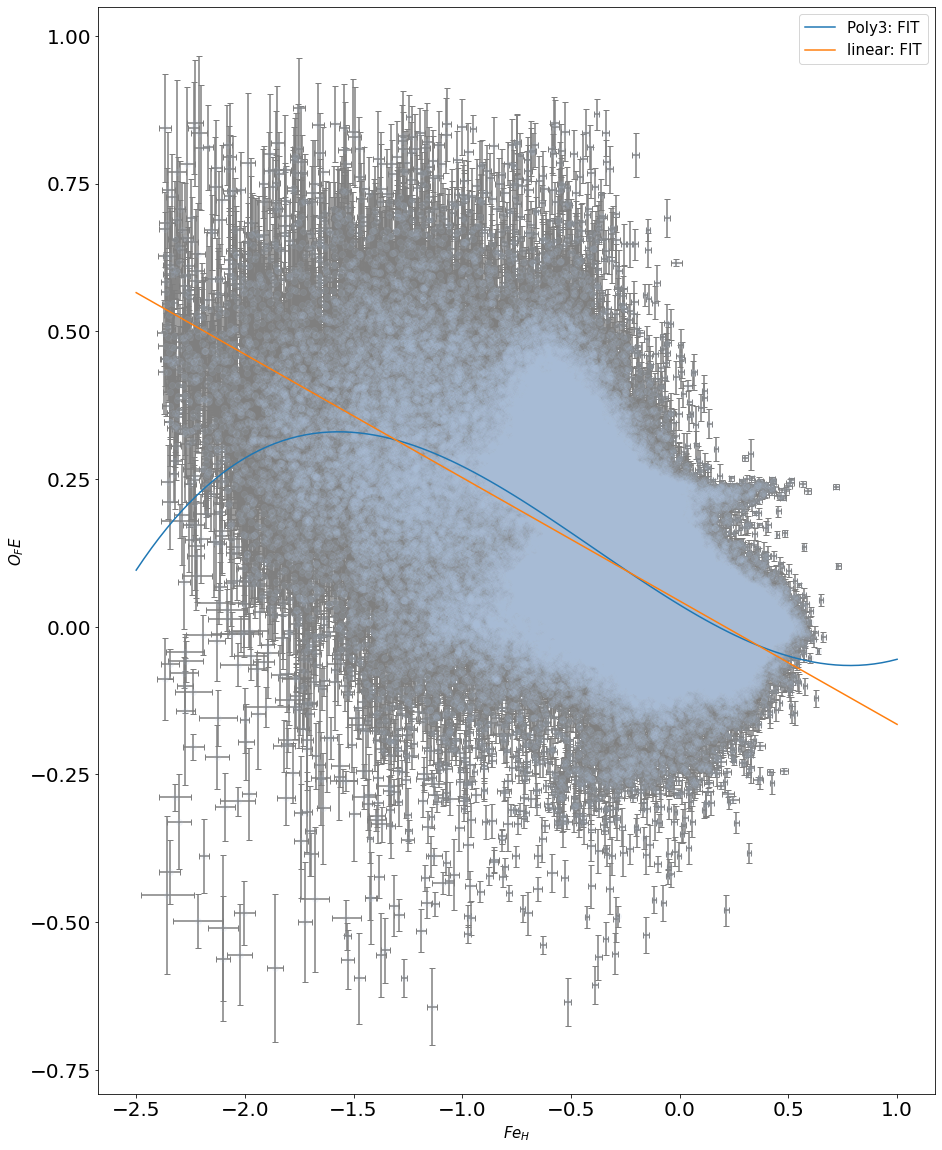

In [48]:
## -2 < GLAT < 2 

mk = (abs(star['GLAT']) > -2) & (star['O_FE'] > -100)
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
xdat = star['Fe_H'][mask]
xdat_err = star['Fe_H_ERR'][mask]
ydat = star['O_FE'][mask]
ydat_err = star['O_FE_ERR'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='lightsteelblue', alpha=0.1,)
ax.errorbar(xdat, ydat, xerr = xdat_err, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.set_xlabel('$Fe_H$', fontsize=15)
ax.set_ylabel('$O_FE$', fontsize=15)

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


a,b,c,d = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err, p0=[4,-4,-1,-0.1])
print("POLY 3: ", a, b, c, d)

ax3 = fig.add_subplot(111)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)

x_plot = np.linspace(-2.5, 1, 100)
ax3.plot(x_plot, poly3(x_plot, a, b, c, d), label='Poly3: FIT')

##Linear Plot 

def linear(x,m,b):
    return m*x+b
slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax4 = fig.add_subplot(111)
ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-2.5, 1,100)
ax4.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')


plt.legend(loc='best', fontsize=15)
plt.show()

a. the best fit parameters are a = 0.0606, b = 0.0714, c = -0.224, d = 0.0369
b. The Poly 3 fit is the best fit
c. There is no obvious linear fit for outliers

LINEAR:  -0.0002955181836617405 2.102205034750773


<ipython-input-45-fd66ab5ddcdc>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


POLY 2:  -1.1422355616234708e-07 0.0006952330689291024 -0.022190649558209267


<ipython-input-45-fd66ab5ddcdc>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)


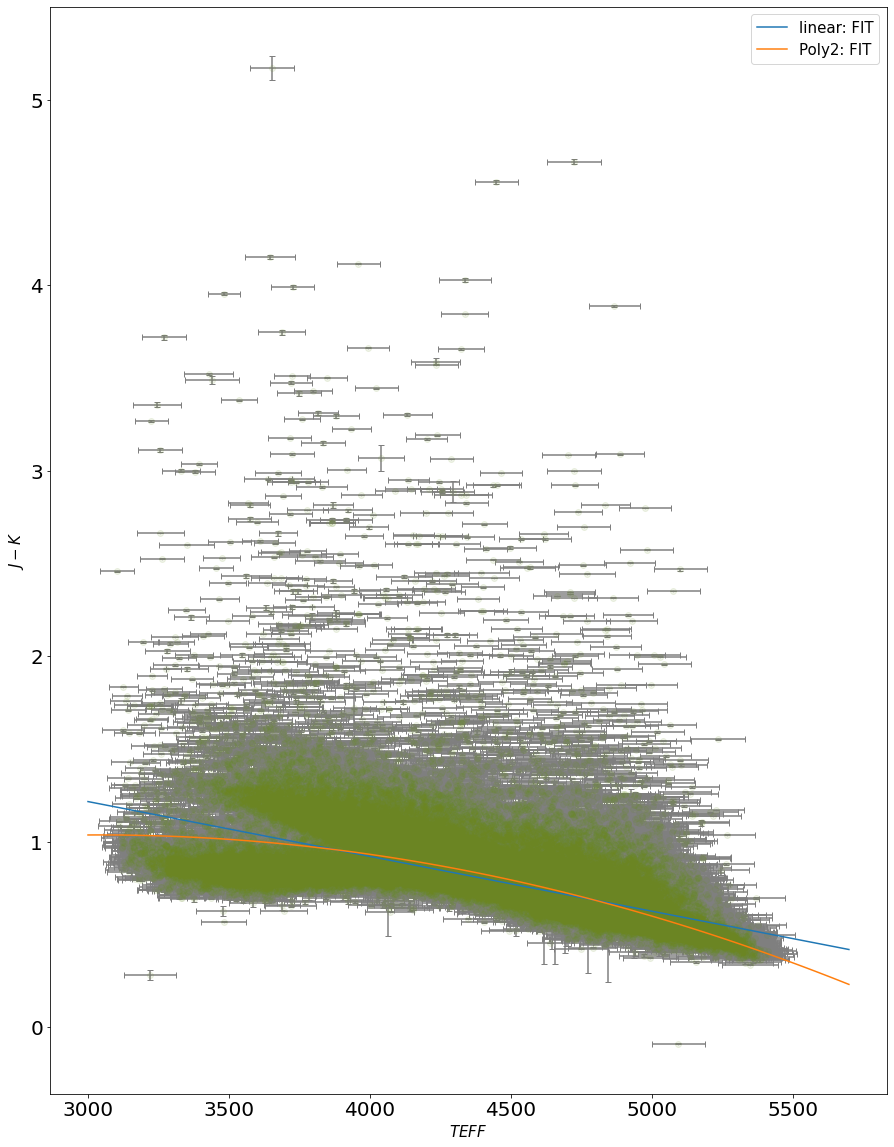

In [45]:
mk = (abs(star['GLAT']) > 10) & ((star['J']-star['K']) < 1000) & (star['TEFF'] > 0) & (star['J_ERR'] < 1) & (star['J_ERR'] >-1) & (star['K_ERR'] >-1) &(star['K_ERR'] < 1) & ((abs(star['TEFF_ERR'])<100))
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
xdat = star['TEFF'][mask]
xdat_err = star['TEFF_ERR'][mask]
ydat = star['J'][mask]-star['K'][mask]
ydat_err = star['J_ERR'][mask] - star['K_ERR'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='olivedrab', alpha=0.1,)
ax.errorbar(xdat, ydat, xerr = xdat_err, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.set_ylabel('$J-K$', fontsize=15)
ax.set_xlabel('$TEFF$', fontsize=15)

##Linear Function

def linear(x,m,b):
    return m*x+b

def mcFit2(func, x, y, x_err, y_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 5700, 100)
ax1.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')

##Poly 2:


def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def mcFit3(func, x, y, x_err, y_err):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

a,b,c = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
print("POLY 2: ", a, b, c)

ax2 = fig.add_subplot(111)
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 5700, 100)
ax2.plot(x_plot,poly2(x_plot, a, b, c), label='Poly2: FIT')

plt.legend(loc='best', fontsize=15)
plt.show()

a. The parameters for the linear fit are m = -0.000296 and b = 2.1022 
b. The linear fit is the best fit. 
c. There is no obvious linear fit for outliers; the linear fit seems to be a pretty good fit for all the data. There are some outliers above the line, but they do not seem to have an obvious relationship. 

COSFIT:  52.86228220314817 0.022559144089736326 0.8215897633511989 1.003597967055093


<ipython-input-49-f8328f7f34ed>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax5 = fig.add_subplot(111)


LINEAR:  -0.013185013741456808 -3.4001372615141827


<ipython-input-49-f8328f7f34ed>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


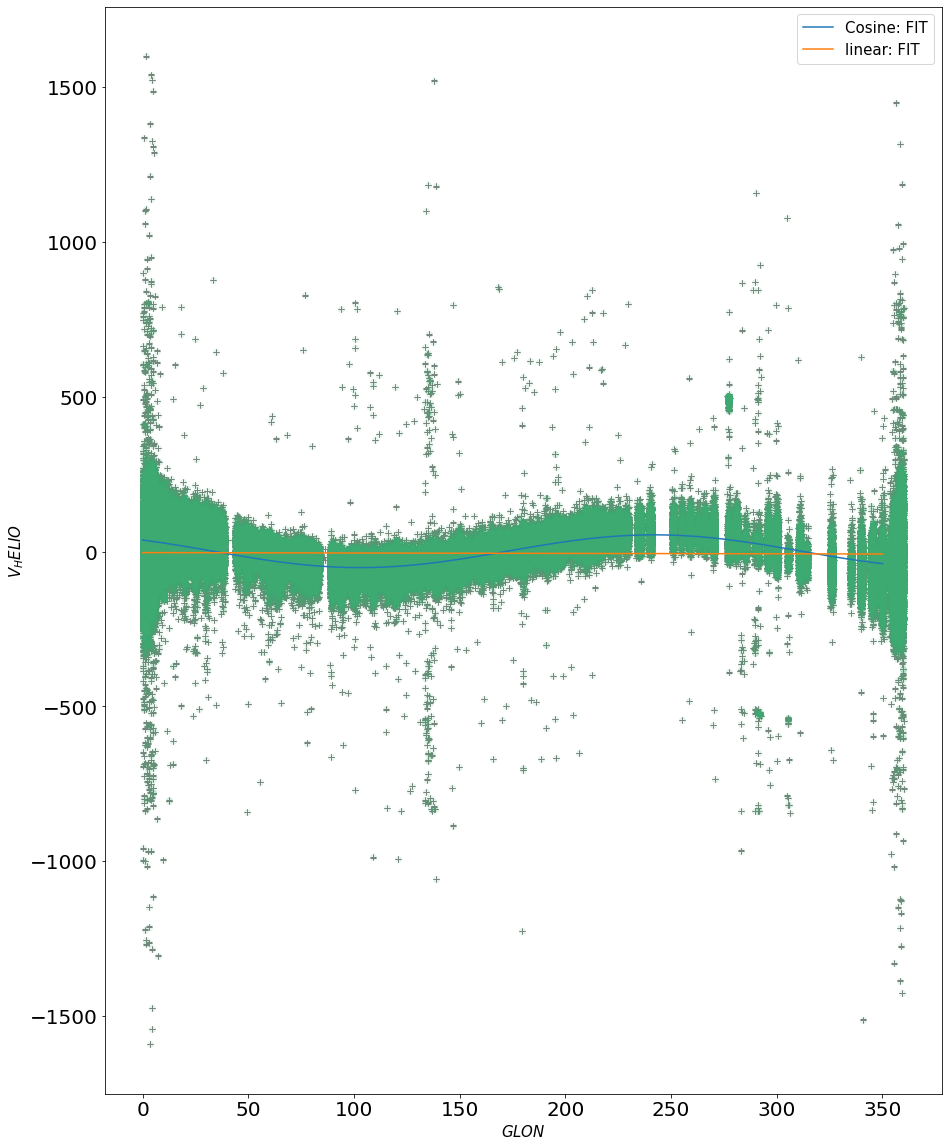

In [49]:
mk = (star['GLAT'] < 10) & (star['GLAT'] > -10) & (star['VERR'] < 1.5)
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['VHELIO_AVG'][mask]
ydat_err = star['VERR'][mask]
xdat_err = 0
xdat = star['GLON'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='mediumseagreen', alpha=0.1)
ax.errorbar(xdat, ydat, xerr = 0, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=0.5, capsize=3 ,zorder=0)
ax.set_xlabel('$GLON$', fontsize=15)
ax.set_ylabel('$V_HELIO$', fontsize=15)

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

a,b,c,d = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err, p0=[55,0.025,0,1])
print("COSFIT: ", a, b, c, d)

ax5 = fig.add_subplot(111)
ax5.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(0, 350, 100)
ax5.plot(x_plot, cosfit(x_plot, a, b, c, d), label = 'Cosine: FIT')

##Linear Function

def linear(x,m,b):
    return m*x+b

def mcFit2(func, x, y, x_err, y_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(0, 350, 100)
ax1.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')


plt.legend(loc='best', fontsize=15)
plt.show()

a. The best-fit parameters for the cosine function are a = 52.86, b = 0.022559, c = 0.821, and d = 1.003. b. The cosine function fits the data the best. c. There are no obvious linear fits for the outliers; the data seems to have an obvious sinuisodal relationship. 

LINEAR:  0.2809587343495638 0.09976537217552514


<ipython-input-13-a568c60db301>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


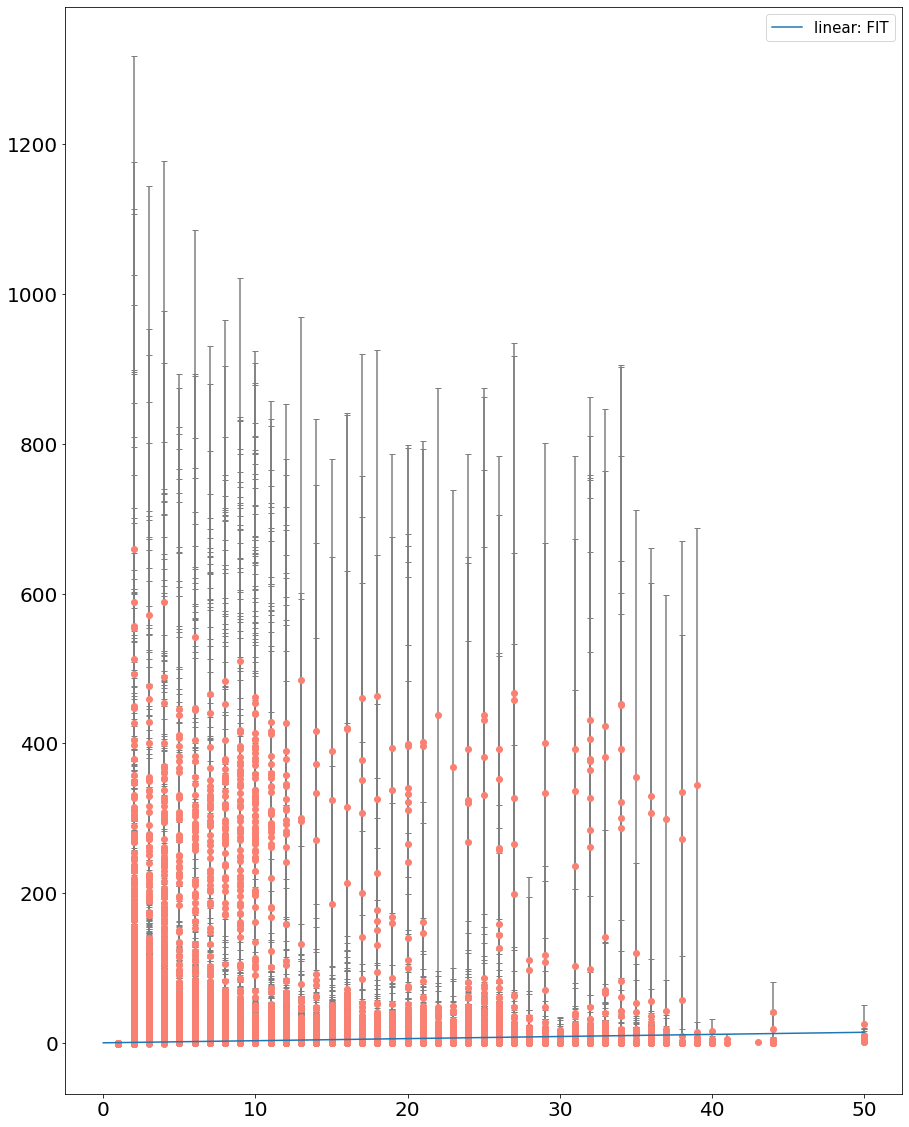

In [13]:
mk = (star['NVISITS'] >= 1)
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['VSCATTER'][mask]
ydat_err = star['VSCATTER'][mask]
xdat_err = 0
xdat = star['NVISITS'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='salmon')
ax.errorbar(xdat, ydat, xerr = xdat_err, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=1, capsize=3 ,zorder=0)

def linear(x,m,b):
    return m*x+b

def mcFit2(func, x, y, x_err, y_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(0, 50, 100)
ax1.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')


plt.legend(loc='best', fontsize=15)
plt.show()

a. The best-fit parameters for the linear function are: a = 0.281 and b = 0.0997. I think the logfit or gaussian function would work the best, however, I could not get these to work for this data set. I graphed a linear function, however, I do not think this is a good model of the data. c. There is no obvious linear function for outliers. 

LINEAR:  0.009798279992579761 0.02070176190770572


<ipython-input-11-8a40be7e25a1>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


POLY 2:  0.014206336954463245 0.02306371985501733 0.02116970864613809


<ipython-input-11-8a40be7e25a1>:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)


POLY 3:  0.018428502405803373 0.0497042458426119 0.031716654557953645 0.019843994283667045


<ipython-input-11-8a40be7e25a1>:112: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = fig.add_subplot(111)


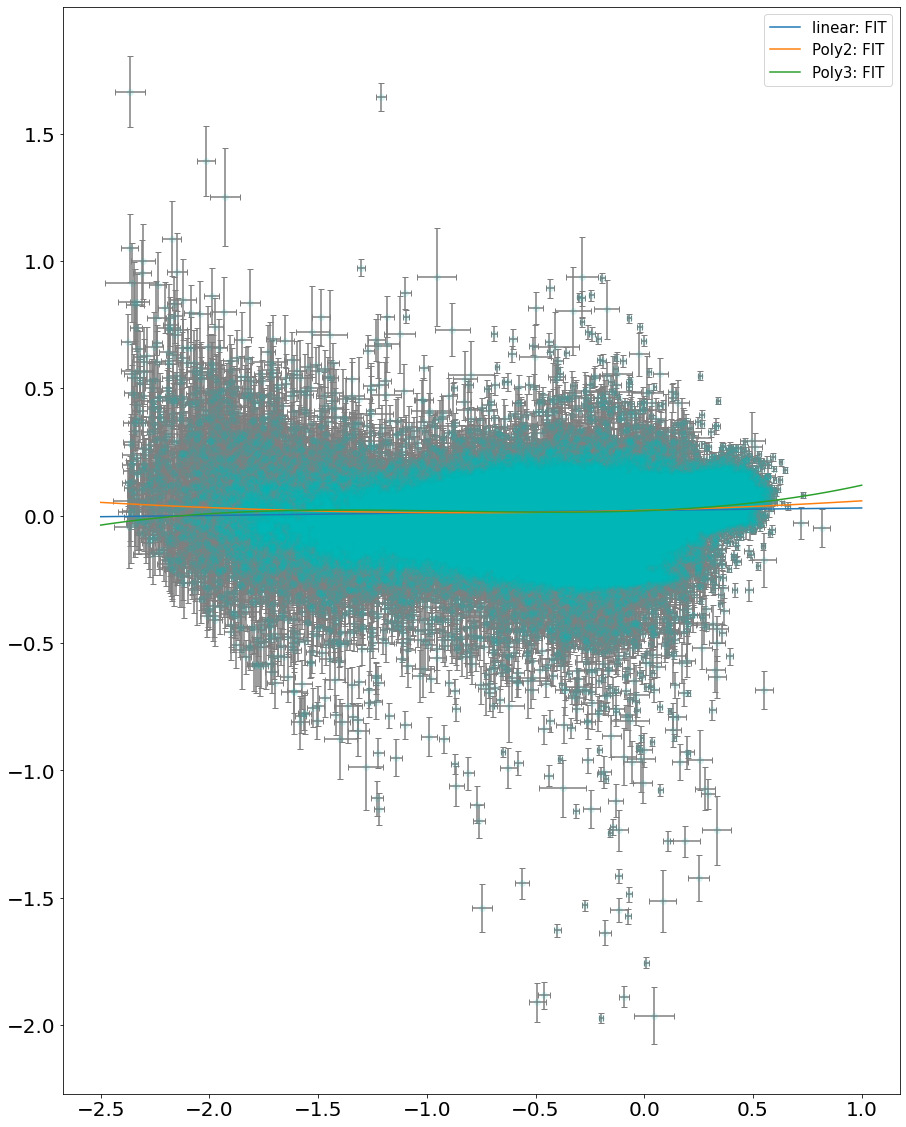

In [11]:
mk = (star['NI_FE'] > -1000) & (star['Fe_H'] > -1000)
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['NI_FE'][mask]
ydat_err = star['NI_FE_ERR'][mask]
xdat = star['Fe_H'][mask]
xdat_err = star['Fe_H_ERR'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='c', alpha=0.1)
ax.errorbar(xdat, ydat, xerr = xdat_err, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=1, capsize=3 ,zorder=0)

def linear(x,m,b):
    return m*x+b

def mcFit2(func, x, y, x_err, y_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-2.5, 1,100)
ax1.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')

##Polynomial 2

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def mcFit3(func, x, y, x_err, y_err):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

a,b,c = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
print("POLY 2: ", a, b, c)

ax2 = fig.add_subplot(111)
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-2.5, 1,100)
ax2.plot(x_plot,poly2(x_plot, a, b, c), label='Poly2: FIT')

##Polynomial 3 

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


a,b,c,d = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err, p0=[5.5005690303880843e-11, -1.0104954338701603e-06, 0.0062171324312588205, -13.78322860510616])
print("POLY 3: ", a, b, c, d)

ax3 = fig.add_subplot(111)
ax3.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-2.5, 1, 100)
ax3.plot(x_plot, poly3(x_plot, a, b, c, d), label='Poly3: FIT')


plt.legend(loc='best', fontsize=15)
plt.show()

a. The poly 2 best fit parameters are 0.014 = a, b = 0.0230, and c = 0.0212. b. The function that fits this data set best is probably the poly 2 or poly 3 line. All of the lines plotted above look  fairly similar. c. There is no obvious linear function to graph outliers. All of the outliers see, to evenly distribute themselves on either side of the functions that are graphed above. 

LINEAR:  0.000979033510612673 -2.3809511906804817


<ipython-input-26-2fa4e6a1c7b0>:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


POLY 2:  -2.0365678419814292e-07 0.003255397020737358 -8.36069046593493


<ipython-input-26-2fa4e6a1c7b0>:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)


POLY 3:  4.891692666768399e-12 -2.8694490041236776e-07 0.003699545642163269 -9.11347415190904


<ipython-input-26-2fa4e6a1c7b0>:126: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = fig.add_subplot(111)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


EXPONENTIAL:  0.0001 -0.01 -0.1 2.0712050027752356


<ipython-input-26-2fa4e6a1c7b0>:141: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig.add_subplot(111)


COSFIT:  1.1158280717868982 0.001894673780526004 -4294.9922922502265 1.9846420915900498


<ipython-input-26-2fa4e6a1c7b0>:156: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax5 = fig.add_subplot(111)
<ipython-input-26-2fa4e6a1c7b0>:167: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


LOGFIT:  1.0 1.0 -5000.0 3.0


<ipython-input-26-2fa4e6a1c7b0>:172: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax6 = fig.add_subplot(111)
<ipython-input-26-2fa4e6a1c7b0>:183: RuntimeWarning: overflow encountered in exp
  return (part1*(np.exp((-1*x - a)**2/(2*b**2))))
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


GAUSIAN:  1.0 1.0


<ipython-input-26-2fa4e6a1c7b0>:188: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax7 = fig.add_subplot(111)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

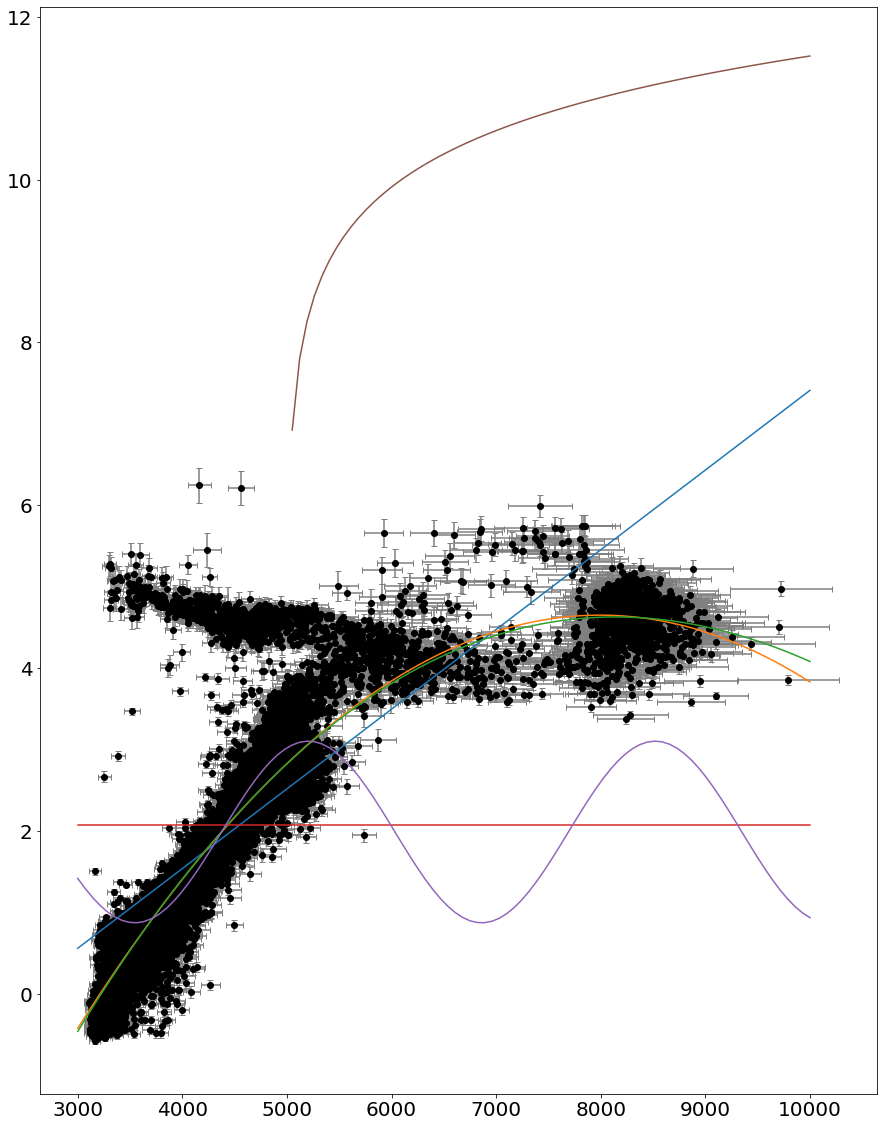

In [26]:
# POTENTIAL FITTING FUNCTIONS

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

mk = (star['GLAT'] < 1) & (star['GLAT'] > -1) & (star['TEFF'] > 0) & (star['LOGG'] > -5)
mask = np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['LOGG'][mask]
ydat_err = star['LOGG_ERR'][mask]
xdat = star['TEFF'][mask]
xdat_err = star['TEFF_ERR'][mask]

fig = plt.figure(figsize=(15,20))
ax= fig.add_subplot(111)
ax.scatter(xdat, ydat, c='black')
ax.errorbar(xdat, ydat, xerr = xdat_err, yerr = ydat_err, c = 'tab:gray', #set the x error size to .5
            fmt='.', markersize=1, capsize=3 ,zorder=0)

##Linear Function

def linear(x,m,b):
    return m*x+b

def mcFit2(func, x, y, x_err, y_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

slope, intercept = mcFit2(linear, xdat, ydat, xdat_err, ydat_err)
print("LINEAR: ", slope, intercept)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000,10000,100)
ax1.plot(x_plot, linear(x_plot, slope, intercept), label='linear: FIT')

##Polynomial 2

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def mcFit3(func, x, y, x_err, y_err):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

a,b,c = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
print("POLY 2: ", a, b, c)

ax2 = fig.add_subplot(111)
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000,10000,100)
ax2.plot(x_plot,poly2(x_plot, a, b, c), label='Poly2: FIT')

##Polynomial 3 

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


a,b,c,d = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err, p0=[5.5005690303880843e-11, -1.0104954338701603e-06, 0.0062171324312588205, -13.78322860510616])
print("POLY 3: ", a, b, c, d)

ax3 = fig.add_subplot(111)
ax3.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 10000, 100)
ax3.plot(x_plot, poly3(x_plot, a, b, c, d), label='Poly3: FIT')

##Exponential function

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

a,b,c,d = mcFit4(exponential, xdat, ydat, xdat_err, ydat_err, p0=[0.0001, -0.01, -0.1, 2])
print("EXPONENTIAL: ", a, b, c, d)

ax4 = fig.add_subplot(111)
ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 10000, 100)
ax4.plot(x_plot, exponential(x_plot, a,b,c,d), label='Exponential: FIT')

##Cosine fit

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

a,b,c,d = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err, p0=[3, 1/1000, -4300, 2])
print("COSFIT: ", a, b, c, d)

ax5 = fig.add_subplot(111)
ax5.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 10000, 100)
ax5.plot(x_plot, cosfit(x_plot, a, b, c, d), label = 'Cosine: FIT')


##Log fit:

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

a,b,c,d = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err, p0=[1,1,-5000,3])
print("LOGFIT: ", a, b, c, d)

ax6 = fig.add_subplot(111)
ax6.xaxis.set_tick_params(labelsize=20)
ax6.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 10000, 100)
ax6.plot(x_plot, logfit(x_plot, a, b, c, d), label = 'Logfit: FIT')

##Gausian 

def gausian(x,a,b):
    part1 = (1.0/np.sqrt(2*np.pi*b**2))
    return (part1*(np.exp((-1*x - a)**2/(2*b**2))))

a, b= mcFit2(gausian, xdat, ydat, xdat_err, ydat_err)
print("GAUSIAN: ", a, b)

ax7 = fig.add_subplot(111)
ax7.xaxis.set_tick_params(labelsize=20)
ax7.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000,10000,100)
ax7.plot(x_plot, gausian(x_plot, a, b), label='Gausian: FIT')

##Lorentzian Cauchy

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

a,b,c = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
print("LORENTZIAN CAUCHY: ", a, b, c)

ax8 = fig.add_subplot(111)
ax8.xaxis.set_tick_params(labelsize=20)
ax8.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000,10000,100)
ax8.plot(x_plot, lorentzian_cauchy(x_plot, a, b, c), label='Lorentzian Cauchy: FIT')

##Sigmoid

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

a,b,c,d = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err, p0=[0, 0.001, 1, 1])
print("SIGMOID: ", a, b, c, d)

ax9 = fig.add_subplot(111)
ax9.xaxis.set_tick_params(labelsize=20)
ax9.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(3000, 10000, 100)
ax9.plot(x_plot, sigmoid(x_plot, a, b, c, d), label='Sigmoid: FIT')

plt.legend(loc='best', fontsize=15)
plt.show()